# Disclaimer
The underlying concept may be weak. Given the dataset, I assume that each region is connected to any other one. So every day each region is connected with all the regions afflicted by Coronavirus. This is how I assumed the virus spreads. If we had access to a flight schedules dataset, we could get the real edges and improve trustworthiness.

In [0]:
import pandas as pd
import io
import requests

# Read updated dataset from source
url = "https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv"
s = requests.get(url).content
dataset = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Group by country, get timeseries by day with cases
list = dataset.groupby('Country.Region').apply(lambda x: [list(x['date']), list(x['cases'])]).apply(list)

In [0]:
import numpy as np
from datetime import datetime

# Get cities
db_dict = list.to_dict()
dim = len(db_dict)

# Start Adjances Matrix
graphs = dict()
dates = []

In [3]:
dataset

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,NaN,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,NaN,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed
...,...,...,...,...,...,...,...
3314,Shanghai,Mainland China,31.2020,121.4491,2020-03-08,1,recovered
3315,Sichuan,Mainland China,30.6171,102.7103,2020-03-08,10,recovered
3316,Taiwan,Taiwan,23.7000,121.0000,2020-03-08,1,recovered
3317,Xinjiang,Mainland China,41.1129,85.2401,2020-03-08,1,recovered


## Sorting the dates from which cases have been found

In [0]:
# Getting dates
for key in db_dict:
  value = db_dict[key]
  k_dates = value[0]

  # Save all unique dates
  for date in k_dates:
    if date not in dates:
      dates.append(date)
    
# Chronological sort
dates.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))

## Populating the adjances graphs day by day

In [5]:
# Populating graphs day by day frame
cnt = 0
graph_edges = None

for day in dates:
  
  infected_nodes = []
  
  # foreach record
  x = 0
  for record in db_dict:
    r_dates = db_dict[record][0]
    
    # There are registered cases for that day
    if day in r_dates:
      infected_nodes.append(x)

    x += 1

  print(day + " --> " + str(len(infected_nodes)) + " regions")

  # Create dense net between all infected nodes
  day_edges = []

  # For each node
  for i in range(len(db_dict)):
    for j in infected_nodes:
      if i is not j:
        day_edges.append(str(i) + "," + str(j))

  # Save interested graph
  if cnt == (len(dates) - 1):
    graph_edges = day_edges

  cnt += 1

# Preparing nodes
graph_nodes = []
i = 0
for key in db_dict.keys():
  graph_nodes.append(key + "," + str(i))
  i += 1

# Saving edges and nodes
with open('graph.edges', mode='wt', encoding='utf-8') as myfile:
  myfile.write('\n'.join(graph_edges))

with open('graph.nodes', mode='wt', encoding='utf-8') as myfile:
  myfile.write('\n'.join(graph_nodes))

2020-01-22 --> 7 regions
2020-01-23 --> 7 regions
2020-01-24 --> 8 regions
2020-01-25 --> 6 regions
2020-01-26 --> 12 regions
2020-01-27 --> 9 regions
2020-01-28 --> 9 regions
2020-01-29 --> 7 regions
2020-01-30 --> 8 regions
2020-01-31 --> 15 regions
2020-02-01 --> 11 regions
2020-02-02 --> 10 regions
2020-02-03 --> 5 regions
2020-02-04 --> 11 regions
2020-02-05 --> 7 regions
2020-02-06 --> 8 regions
2020-02-07 --> 12 regions
2020-02-08 --> 10 regions
2020-02-09 --> 10 regions
2020-02-10 --> 10 regions
2020-02-11 --> 10 regions
2020-02-12 --> 16 regions
2020-02-13 --> 11 regions
2020-02-14 --> 7 regions
2020-02-15 --> 9 regions
2020-02-16 --> 12 regions
2020-02-17 --> 11 regions
2020-02-18 --> 8 regions
2020-02-19 --> 8 regions
2020-02-20 --> 8 regions
2020-02-21 --> 16 regions
2020-02-22 --> 8 regions
2020-02-23 --> 10 regions
2020-02-24 --> 16 regions
2020-02-25 --> 22 regions
2020-02-26 --> 30 regions
2020-02-27 --> 26 regions
2020-02-28 --> 30 regions
2020-02-29 --> 38 regions
202

# Setting up the link prediction system


In [6]:
dates

['2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08']

In [0]:
!tail graph.nodes

Taiwan,89
Thailand,90
Togo,91
Tunisia,92
UK,93
US,94
Ukraine,95
United Arab Emirates,96
Vatican City,97
Vietnam,98

In [0]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
# load nodes details
with open("graph.nodes") as f:
    nodes = f.read().splitlines() 

# load edges (or links)
with open("graph.edges") as f:
    links = f.read().splitlines() 

len(nodes), len(links)
print(links)

['0,1', '0,3', '0,5', '0,6', '0,8', '0,10', '0,11', '0,13', '0,15', '0,16', '0,18', '0,19', '0,20', '0,21', '0,22', '0,23', '0,25', '0,26', '0,28', '0,29', '0,31', '0,33', '0,34', '0,36', '0,37', '0,38', '0,39', '0,40', '0,41', '0,42', '0,43', '0,44', '0,48', '0,51', '0,52', '0,53', '0,54', '0,55', '0,59', '0,60', '0,62', '0,63', '0,65', '0,66', '0,67', '0,68', '0,69', '0,70', '0,71', '0,73', '0,74', '0,79', '0,80', '0,81', '0,82', '0,84', '0,85', '0,87', '0,88', '0,89', '0,90', '0,91', '0,93', '0,94', '0,97', '1,3', '1,5', '1,6', '1,8', '1,10', '1,11', '1,13', '1,15', '1,16', '1,18', '1,19', '1,20', '1,21', '1,22', '1,23', '1,25', '1,26', '1,28', '1,29', '1,31', '1,33', '1,34', '1,36', '1,37', '1,38', '1,39', '1,40', '1,41', '1,42', '1,43', '1,44', '1,48', '1,51', '1,52', '1,53', '1,54', '1,55', '1,59', '1,60', '1,62', '1,63', '1,65', '1,66', '1,67', '1,68', '1,69', '1,70', '1,71', '1,73', '1,74', '1,79', '1,80', '1,81', '1,82', '1,84', '1,85', '1,87', '1,88', '1,89', '1,90', '1,91', 

In [0]:
# capture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 6370/6370 [00:00<00:00, 711334.30it/s]


,node_1,node_2
0,0,1
1,0,3
2,0,5
3,0,6
4,0,8


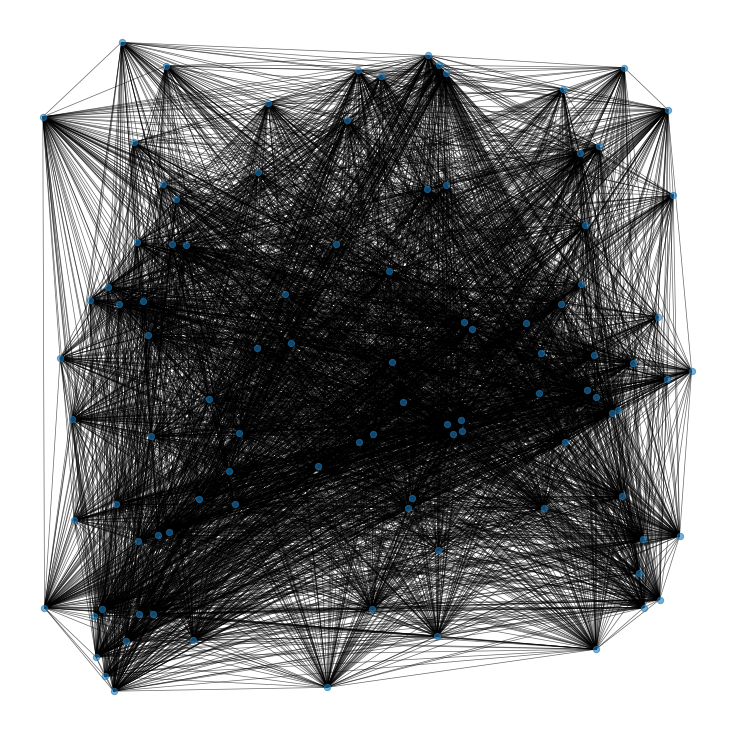

In [0]:
# create graph
G = nx.from_pandas_edgelist(df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

## Negative adjancy matrix to dropout some edges

In [0]:
# build adjacency matrix
node_list = node_list_1 + node_list_2

adj_G = nx.to_numpy_matrix(G, nodelist = db_dict)

adj_G.shape

(99, 99)

In [0]:
# finding unconnected nodes
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, str(i), str(j)) <=2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_list[i],node_list[j]])

  offset = offset + 1

100%|██████████| 99/99 [00:00<00:00, 1129.87it/s]


In [0]:
len(all_unconnected_pairs)

4851

In [0]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

## Edges dropout for graph framing


In [0]:
initial_node_count = len(G.nodes)

df_temp = df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    df_temp = df_temp.drop(index = i)

100%|██████████| 6370/6370 [00:44<00:00, 142.32it/s]


In [0]:
len(omissible_links_index)

6272

In [0]:
# create dataframe of removable edges
df_ghost = df.loc[omissible_links_index]

# add the target variable 'link' -> it is a link that exists, but we are omitting since we want to predict it
df_ghost['link'] = 1

data = data.append(df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)
data['link'].value_counts()

1    6272
0    4851
Name: link, dtype: int64

In [0]:
# drop removable edges --> graph at time 0
df_partial = df.drop(index=df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(df_partial, "node_1", "node_2", create_using=nx.Graph())

In [0]:
!pip install node2vec

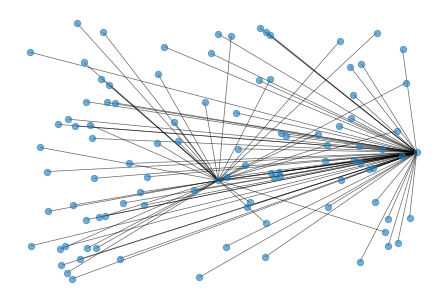

In [0]:
G_data
nx.draw(G_data, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [0]:
from node2vec import Node2Vec

# Encoding graph representation with Node2Vec -> Graph-feature representation
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:03<00:00, 14.79it/s]


In [0]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# 1 - Logistic Regression

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [0]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = lr.predict_proba(xtest)
xtest

array([[-0.54763865,  0.502415  ,  0.3321689 , ..., -0.14211391,
         0.18556662, -0.49702817],
       [-0.16416994,  0.06186527,  0.17594673, ..., -0.05335304,
        -0.6333407 ,  0.05316785],
       [-0.16416994,  0.06186527,  0.17594673, ..., -0.05335304,
        -0.6333407 ,  0.05316785],
       ...,
       [-0.61397475,  0.5848524 ,  0.38032755, ..., -0.14973344,
         0.24908601, -0.5762056 ],
       [-0.14311182,  0.0682855 ,  0.15524195, ..., -0.04076168,
        -0.49821675,  0.01606485],
       [ 0.2192988 , -0.37868446,  0.01972454, ...,  0.03540783,
        -1.4522481 ,  0.6033639 ]], dtype=float32)

In [0]:
# Scoring prediction ability
roc_auc_score(ytest, predictions[:,1])
predictions.shape

(3337, 2)

### Testing out the model with new data
So at this point, the idea would be adding new cities to the graph and run the model on it. Problem: is the starting connection principle too weak? How can I build the new graph from edges if there is not any new edge to this new node (isolated, new node = not infected yet city).

# 2 - Light GBM 

In [0]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[1]	valid_0's auc: 0.997857
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.999159
[3]	valid_0's auc: 1
[4]	valid_0's auc: 1
[5]	valid_0's auc: 1
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
[12]	valid_0's auc: 1
[13]	valid_0's auc: 1
[14]	valid_0's auc: 1
[15]	valid_0's auc: 1
[16]	valid_0's auc: 1
[17]	valid_0's auc: 1
[18]	valid_0's auc: 1
[19]	valid_0's auc: 1
[20]	valid_0's auc: 1
[21]	valid_0's auc: 1
[22]	valid_0's auc: 1
[23]	valid_0's auc: 1
Early stopping, best iteration is:
[3]	valid_0's auc: 1
